In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
import plotly.express as px
from shapely.geometry import Point


In [5]:
dataOrg = pd.read_csv("data/query.csv")

In [168]:
dataOrg

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,DateTime
0,2009-01-01T12:36:55.740Z,9.4300,124.1510,525.300,4.5,mb,53.0,80.3,NaN,0.90,...,"20 km SSW of Valencia, Philippines",earthquake,NaN,5.700,NaN,14.0,reviewed,us,us,2009-01-01 12:36:55.740000+00:00
1,2009-01-02T05:16:44.020Z,7.9510,126.3660,98.400,4.1,mb,13.0,110.5,NaN,0.76,...,"8 km N of Boston, Philippines",earthquake,NaN,17.500,NaN,2.0,reviewed,us,us,2009-01-02 05:16:44.020000+00:00
2,2009-01-03T16:53:11.000Z,6.6520,123.5750,615.100,4.5,mb,51.0,74.0,NaN,0.86,...,"51 km W of Taguisa, Philippines",earthquake,NaN,6.200,NaN,17.0,reviewed,us,us,2009-01-03 16:53:11+00:00
3,2009-01-04T02:19:32.850Z,4.9830,127.4040,83.800,4.6,mb,39.0,63.1,NaN,0.79,...,"204 km SE of Pondaguitan, Philippines",earthquake,NaN,10.600,NaN,11.0,reviewed,us,us,2009-01-04 02:19:32.850000+00:00
4,2009-01-05T08:23:42.220Z,8.0990,121.4440,35.000,4.5,mb,26.0,78.2,NaN,1.14,...,"87 km WNW of Siocon, Philippines",earthquake,NaN,NaN,NaN,8.0,reviewed,us,us,2009-01-05 08:23:42.220000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,2024-09-22T07:31:31.184Z,13.9305,120.7585,219.461,4.1,mb,47.0,111.0,8.302,0.95,...,"2 km ESE of Balayan, Philippines",earthquake,12.00,8.530,0.097,29.0,reviewed,us,us,2024-09-22 07:31:31.184000+00:00
9111,2024-09-22T08:22:45.914Z,5.7247,126.9841,133.140,4.4,mb,34.0,115.0,1.933,0.58,...,"113 km SE of Pondaguitan, Philippines",earthquake,8.10,6.984,0.105,26.0,reviewed,us,us,2024-09-22 08:22:45.914000+00:00
9112,2024-09-23T23:41:10.246Z,19.6376,120.5083,15.995,4.5,mb,41.0,114.0,3.209,0.69,...,"122 km NNW of Pagudpud, Philippines",earthquake,8.26,3.026,0.100,29.0,reviewed,us,us,2024-09-23 23:41:10.246000+00:00
9113,2024-09-26T23:27:42.918Z,8.2553,127.3199,10.000,4.7,mb,56.0,109.0,2.089,0.84,...,"98 km E of Barcelona, Philippines",earthquake,8.78,1.874,0.065,73.0,reviewed,us,us,2024-09-26 23:27:42.918000+00:00


In [7]:
dataOrg['DateTime'] = pd.to_datetime(dataOrg['time'])
data = dataOrg.sort_values(by='DateTime')
selection2 = data['place'].str.contains('Philippines', case=True)
data = data[selection2]

In [8]:
data_rest = data[['DateTime','latitude','longitude','mag']].set_index('DateTime')

In [9]:
data_rest.head()

,latitude,longitude,mag
DateTime,,,
2009-01-01 12:36:55.740000+00:00,9.430,124.151,4.5
2009-01-02 05:16:44.020000+00:00,7.951,126.366,4.1
2009-01-03 16:53:11+00:00,6.652,123.575,4.5
2009-01-04 02:19:32.850000+00:00,4.983,127.404,4.6
2009-01-05 08:23:42.220000+00:00,8.099,121.444,4.5


In [10]:
high_mag_data = data_rest[data_rest['mag']>=5]
low_mag_data = data_rest[data_rest['mag']<5]

In [17]:
full_daily_counts = low_mag_data.resample('D').size()
full_weekly_counts = low_mag_data.resample('W').size()

low_daily_counts = low_mag_data.resample('D').size()
low_weekly_counts = low_mag_data.resample('W').size()

high_daily_counts = high_mag_data.resample('D').size()
high_weekly_counts = high_mag_data.resample('W').size()


Text(0, 0.5, 'Counts')

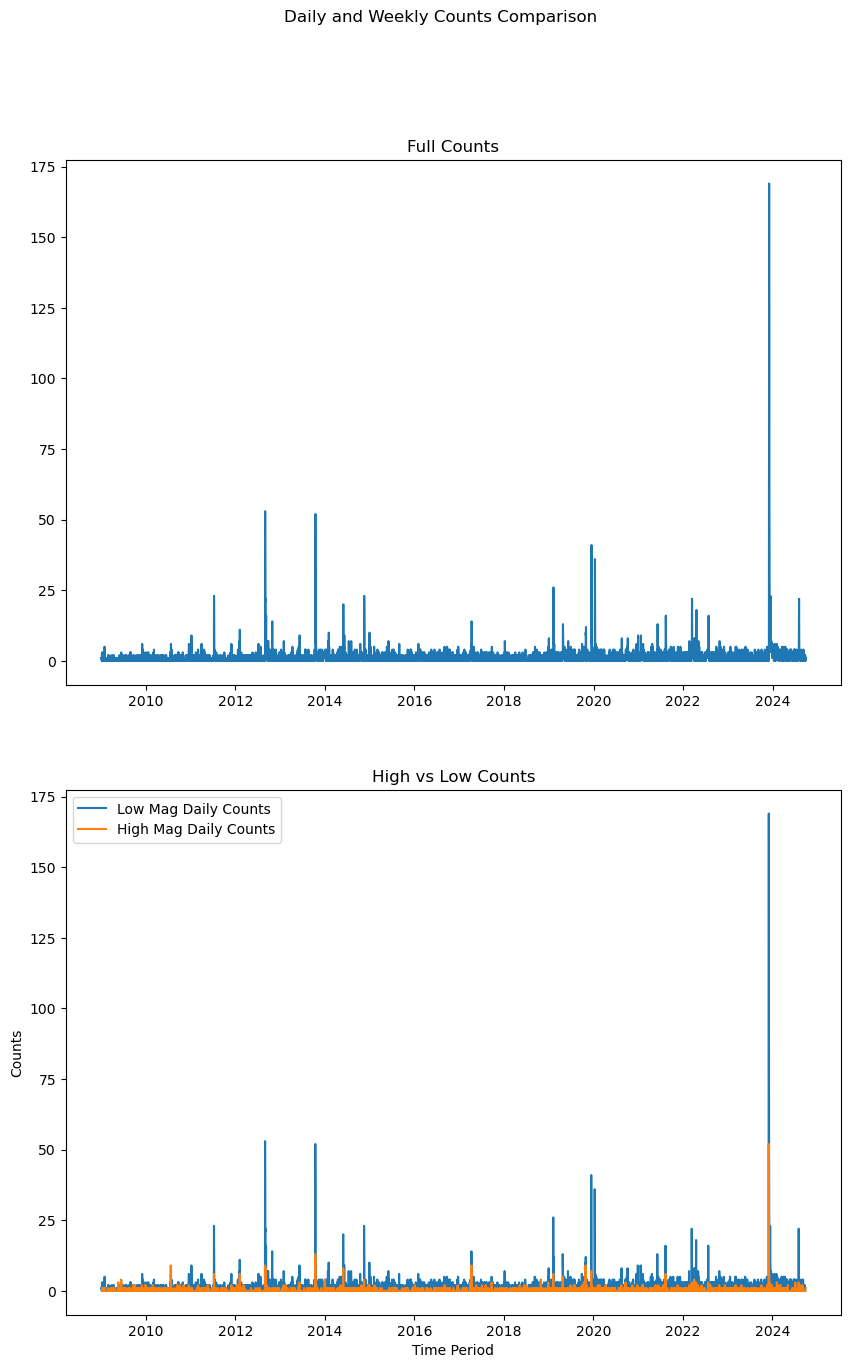

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

axs[0].plot(full_daily_counts, label="Full Daily Counts")
axs[0].set_title("Full Counts")

axs[1].plot(low_daily_counts, label="Low Mag Daily Counts")
axs[1].set_title("High vs Low Counts")

axs[1].plot(high_daily_counts, label="High Mag Daily Counts")
axs[1].legend()
fig.suptitle('Daily and Weekly Counts Comparison')
plt.xlabel('Time Period')
plt.ylabel('Counts')

C:\Users\20204147\AppData\Local\Temp\ipykernel_14760\2661762563.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


<Axes: >

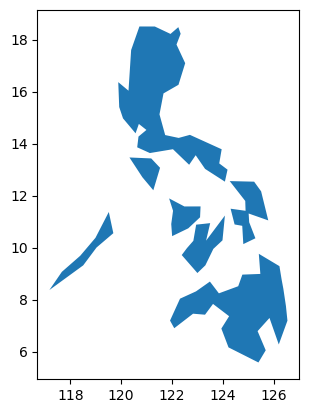

In [64]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

philippines_map = worldmap[worldmap['name'] == 'Philippines']

philippines_map.plot()


<Axes: >

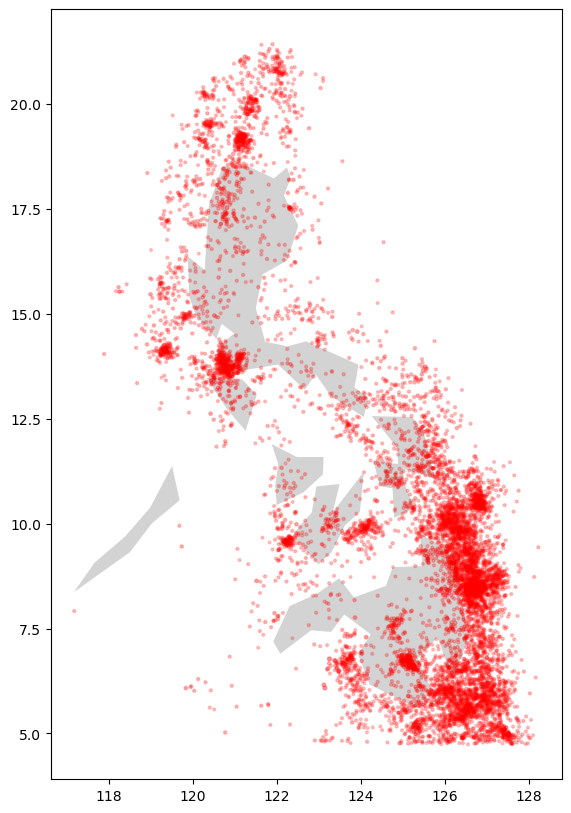

In [158]:
fig, ax = plt.subplots(figsize=(10, 10))

data_rest['geometry'] = data_rest.apply(lambda x: Point(x['longitude'], x['latitude']), axis=1)
data_rest = gpd.GeoDataFrame(data_rest, geometry='geometry')


philippines_map.plot(ax=ax, color='lightgray')  
data_rest.plot(ax=ax, color='red', markersize=data_rest['mag'], alpha=0.05*data_rest['mag'], label='Earthquakes') 




In [51]:
tectonic_plates = pd.read_csv("data/all.csv" )
#https://www.kaggle.com/datasets/cwthompson/tectonic-plate-boundaries?resource=download
tectonic_plates

tectonic_lines = tectonic_plates.groupby('plate').apply(
    lambda group: LineString(zip(group['lon'], group['lat']))
)

tectonic_gdf = gpd.GeoDataFrame(tectonic_lines, columns=['geometry'], geometry='geometry')


<Axes: >

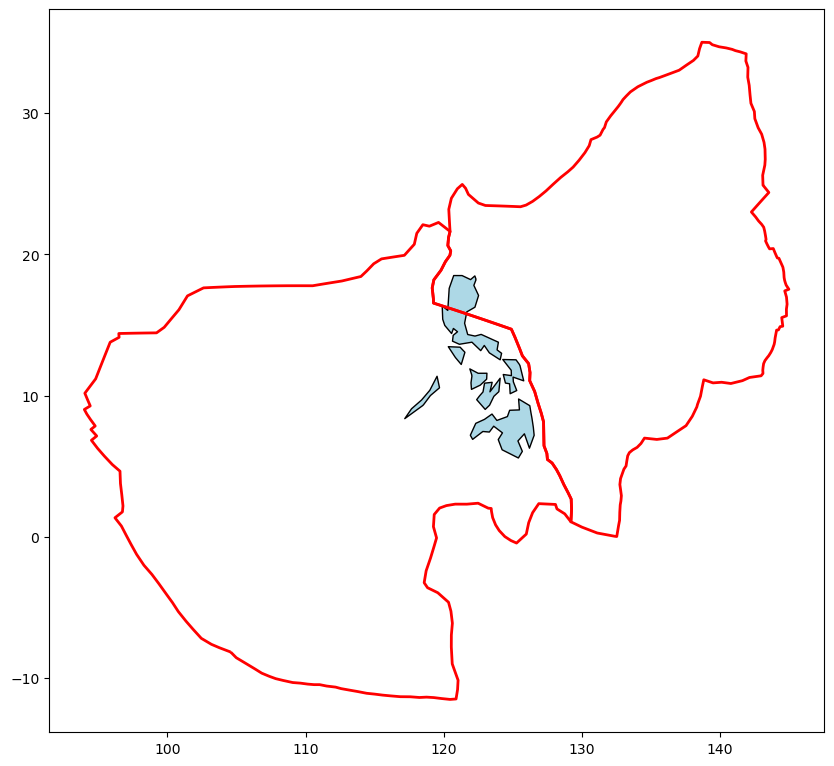

In [70]:
fig, ax = plt.subplots(figsize=(10, 10))


tectonic_gdf_clipped = tectonic_gdf.sjoin(philippines_map)
philippines_map.plot(ax=ax, color='lightblue', edgecolor='black')

tectonic_gdf_clipped.plot(ax=ax, color='red', linewidth=2)


In [111]:
#low_weekly_counts,high_weekly_counts
df = pd.DataFrame({
    'low_mag': low_weekly_counts,
    'high_mag': high_weekly_counts
}).fillna(0)
df.reset_index(inplace=True)

df['Year'] = df['DateTime'].dt.year

In [128]:
df_melted = df.melt(id_vars='DateTime', value_vars=['low_mag', 'high_mag'], 
                    var_name='Magnitude_Type', value_name='Count')


In [166]:
data_rest

,latitude,longitude,mag,geometry
DateTime,,,,
2009-01-01 12:36:55.740000+00:00,9.4300,124.1510,4.5,POINT (124.15100 9.43000)
2009-01-02 05:16:44.020000+00:00,7.9510,126.3660,4.1,POINT (126.36600 7.95100)
2009-01-03 16:53:11+00:00,6.6520,123.5750,4.5,POINT (123.57500 6.65200)
2009-01-04 02:19:32.850000+00:00,4.9830,127.4040,4.6,POINT (127.40400 4.98300)
2009-01-05 08:23:42.220000+00:00,8.0990,121.4440,4.5,POINT (121.44400 8.09900)
...,...,...,...,...
2024-09-22 07:31:31.184000+00:00,13.9305,120.7585,4.1,POINT (120.75850 13.93050)
2024-09-22 08:22:45.914000+00:00,5.7247,126.9841,4.4,POINT (126.98410 5.72470)
2024-09-23 23:41:10.246000+00:00,19.6376,120.5083,4.5,POINT (120.50830 19.63760)


In [169]:
df_melted['Year'] = df_melted['DateTime'].dt.year

fig = px.line(df_melted, x='DateTime', y='Count',
              color='Magnitude_Type', 
              title='Number of low and high magnitude earthquakes over time per week',
              line_shape='linear')


fig.update_layout(yaxis_title='Count', xaxis_title='Date', showlegend=True)

fig.show()

c:\Users\20204147\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

